# **Data Science, Model Evaluation and Selection**

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import files
files.upload()

Saving juice.csv to juice.csv


{'juice.csv': b'Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE\r\n1,CH,237,1,1.75,1.99,0,0,0,0,0.5,1.99,1.75,0.24,No,0,0,0.24,1\r\n2,CH,239,1,1.75,1.99,0,0.3,0,1,0.6,1.69,1.75,-0.06,No,0.150754,0,0.24,1\r\n3,CH,245,1,1.86,2.09,0.17,0,0,0,0.68,2.09,1.69,0.4,No,0,0.091398,0.23,1\r\n4,MM,227,1,1.69,1.69,0,0,0,0,0.4,1.69,1.69,0,No,0,0,0,1\r\n5,CH,228,7,1.69,1.69,0,0,0,0,0.956535,1.69,1.69,0,Yes,0,0,0,0\r\n6,CH,230,7,1.69,1.99,0,0,0,1,0.965228,1.99,1.69,0.3,Yes,0,0,0.3,0\r\n7,CH,232,7,1.69,1.99,0,0.4,1,1,0.972182,1.59,1.69,-0.1,Yes,0.201005,0,0.3,0\r\n8,CH,234,7,1.75,1.99,0,0.4,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0,0.24,0\r\n9,CH,235,7,1.75,1.99,0,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0,0.24,0\r\n10,CH,238,7,1.75,1.99,0,0.4,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0,0.24,0\r\n11,CH,240,7,1.86,2.09,0,0,0,0,0.988606,2.09,1.86,0.23,Yes,0,0,0.23,0\r\n12,C

In [3]:
df = pd.read_csv('juice.csv')

df.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [4]:
df.shape

(1070, 19)

In [5]:
encode = LabelEncoder()

encode_purchase = encode.fit_transform(df['Purchase'])
encode_store7 = encode.fit_transform(df['Store7'])

df['Purchase'] = encode_purchase
df['Store7'] = encode_store7

df.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,2,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,3,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,4,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,5,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [6]:
seventy,thirty = train_test_split(df,test_size=0.3)

X = seventy.iloc[:, seventy.columns != 'Purchase']
Y = seventy.iloc[:,1]

A = thirty.iloc[:, thirty.columns != 'Purchase']
B = thirty.iloc[:,1]

In [17]:
# Classification with Logistic Regression
k = 10
kf = KFold(n_splits=k, random_state=None)

model = LogisticRegression(solver= 'liblinear')
svm = SVC(kernel='linear',probability=True)
 
acc_score_log70 = []

for train_index, test_index in kf.split(X):
    
    X_train , X_test = X.iloc[train_index],X.iloc[test_index]
    y_train , y_test = Y.iloc[train_index] , Y.iloc[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score_log70.append(acc)


avg_acc_score_log70 = sum(acc_score_log70)/k
 
print('accuracy of each fold - {}'.format(acc_score_log70))
print('Avg accuracy Logistic Regression : {}'.format(avg_acc_score_log70))

accuracy of each fold - [0.7733333333333333, 0.8533333333333334, 0.8133333333333334, 0.7466666666666667, 0.8533333333333334, 0.88, 0.84, 0.8666666666666667, 0.8, 0.8783783783783784]
Avg accuracy Logistic Regression : 0.8305045045045045


In [19]:
k = 10
kf = KFold(n_splits=k, random_state=None)


 
acc_score_svm = []

for train_index, test_index in kf.split(X):
    
    X_train , X_test = X.iloc[train_index],X.iloc[test_index]
    y_train , y_test = Y.iloc[train_index] , Y.iloc[test_index]

    svm.fit(X_train,y_train)
    pred_values = svm.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score_svm.append(acc)


avg_acc_score_svm = sum(acc_score_svm)/k
 
print('accuracy of each fold - {}'.format(acc_score_svm))
print('Avg accuracy SVM : {}'.format(avg_acc_score_svm))

accuracy of each fold - [0.8, 0.8533333333333334, 0.8133333333333334, 0.7866666666666666, 0.84, 0.88, 0.84, 0.8533333333333334, 0.8, 0.8783783783783784]
Avg accuracy SVM : 0.8345045045045045


In [15]:
# Klasifikasi menggunakan Naive Bayes
tree = DecisionTreeClassifier()
 
acc_score_tree70 = []

for train_index, test_index in kf.split(X):
    
    X_train , X_test = X.iloc[train_index],X.iloc[test_index]
    y_train , y_test = Y.iloc[train_index] , Y.iloc[test_index]

    tree.fit(X_train,y_train)
    pred_values = tree.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score_tree70.append(acc)


avg_acc_score_tree70 = sum(acc_score_tree70)/k
 
print('accuracy of each fold - {}'.format(acc_score_tree70))
print('Avg accuracy decision tree: {}'.format(avg_acc_score_tree70))

accuracy of each fold - [0.6666666666666666, 0.72, 0.72, 0.6266666666666667, 0.8933333333333333, 0.88, 0.76, 0.7733333333333333, 0.7466666666666667, 0.8378378378378378]
Avg accuracy decision tree: 0.7624504504504505


In [12]:
nb = GaussianNB()
 
acc_score_nb = []

for train_index, test_index in kf.split(X):
    
    X_train , X_test = X.iloc[train_index],X.iloc[test_index]
    y_train , y_test = Y.iloc[train_index] , Y.iloc[test_index]

    nb.fit(X_train,y_train)
    pred_values = nb.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score_nb.append(acc)


avg_acc_score_nb = sum(acc_score_nb)/k
 
print('accuracy of each fold - {}'.format(acc_score_nb))
print('Avg accuracy Naive Bayes: {}'.format(avg_acc_score_nb))

accuracy of each fold - [0.7466666666666667, 0.76, 0.7733333333333333, 0.6666666666666666, 0.7733333333333333, 0.8266666666666667, 0.8266666666666667, 0.7466666666666667, 0.7333333333333333, 0.7297297297297297]
Avg accuracy Naive Bayes: 0.7583063063063064


In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
 
acc_score_knn = []

for train_index, test_index in kf.split(A):
    
    A_train , A_test = A.iloc[train_index],A.iloc[test_index]
    B_train , B_test = B.iloc[train_index] , B.iloc[test_index]

    knn.fit(A_train,B_train)
    pred_values = knn.predict(A_test)
     
    acc = accuracy_score(pred_values , B_test)
    acc_score_knn.append(acc)


avg_acc_score_knn = sum(acc_score_knn)/k
 
print('accuracy of each fold - {}'.format(acc_score_knn))
print('Avg accuracy KNN: {}'.format(avg_acc_score_knn))

accuracy of each fold - [0.7272727272727273, 0.71875, 0.875, 0.875, 0.75, 0.8125, 0.71875, 0.78125, 0.75, 0.75]
Avg accuracy KNN: 0.7758522727272728


Logistic: ROC AUC=0.895
Decision Tree: ROC AUC=1.000
SVM: ROC AUC=0.895
Naive Bayes: ROC AUC=0.820
KNN: ROC AUC=0.907
No Skill: ROC AUC=0.500


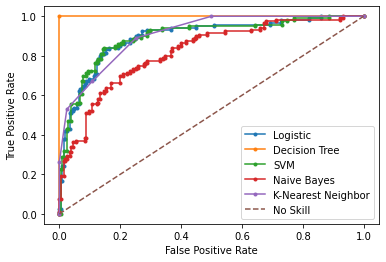

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(B))]



model.fit(A,B)
svm.fit(A,B)
tree.fit(A,B)
nb.fit(A,B)
knn.fit(A,B)

# predict probabilities
lr_probs = model.predict_proba(A)
tree_probs = tree.predict_proba(A)
svm_probs = svm.predict_proba(A)
nb_probs = nb.predict_proba(A)
knn_probs = knn.predict_proba(A)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
tree_probs = tree_probs[:, 1]
svm_probs = svm_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(B, lr_probs)
tree_auc = roc_auc_score(B, tree_probs)
svm_auc = roc_auc_score(B, svm_probs)
nb_auc = roc_auc_score(B, nb_probs)
knn_auc = roc_auc_score(B, knn_probs)
ns_auc = roc_auc_score(B, ns_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Decision Tree: ROC AUC=%.3f' % (tree_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(B, lr_probs)
tree_fpr, tree_tpr, _ = roc_curve(B, tree_probs)
svm_fpr, svm_tpr, _ = roc_curve(B, svm_probs)
nb_fpr, nb_tpr, _ = roc_curve(B, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(B, knn_probs)
ns_fpr, ns_tpr, _ = roc_curve(B, ns_probs)

# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbor')
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()